# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, kurtosis, jarque_bera, gaussian_kde, norm
from matplotlib.lines import Line2D

# Generations using Standard Normal Innovations

In [4]:
# GJR-GARCH(1,1) parameters
omega = 0.25
alpha = 0.1
beta_param = 0.7
lambd = 0.2 # Asymmetry parameter
T = 50000 # Time length
n_paths = 10 # numer of sampled paths

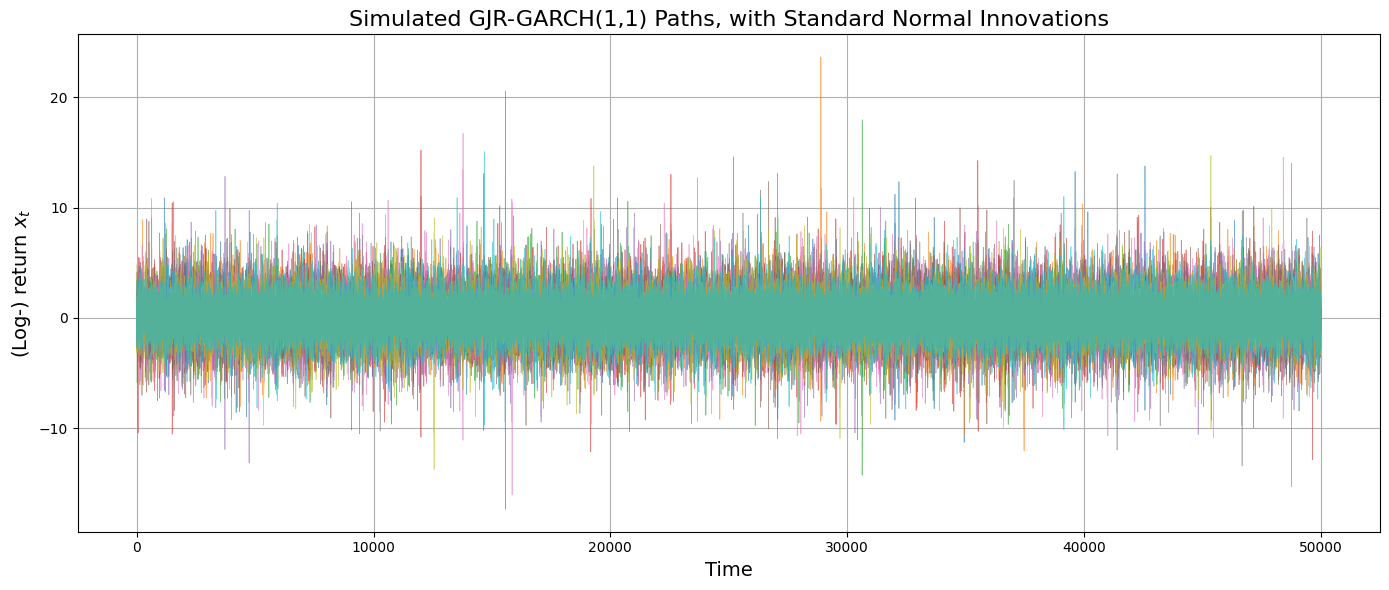

In [46]:
#T = 50000 # Time length
#n_paths = 10 # numer of sampled paths

np.random.seed(42)

all_xt = []

for path in range(n_paths):
    xt = np.zeros(T)
    sigma2 = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)

    # Initialise with unconditional variance
    sigma2[0] = omega / (1 - alpha - beta_param - 0.5 * lambd)
    xt[0] = np.sqrt(sigma2[0]) * epsilon[0]

    for t in range(1, T):
        indicator = 1 if xt[t-1] < 0 else 0
        alpha_t = alpha + lambd * indicator
        sigma2[t] = omega + alpha_t * xt[t-1]**2 + beta_param * sigma2[t-1]
        xt[t] = np.sqrt(sigma2[t]) * epsilon[t]

    all_xt.append(xt)

# Plot the GJR-GARCH(1,1) paths with reduced opacity
plt.figure(figsize=(14, 6))
for i, xt in enumerate(all_xt):
    plt.plot(xt, label=f'Path {i+1}', linewidth=0.5, alpha=0.6)
plt.title('Simulated GJR-GARCH(1,1) Paths, with Standard Normal Innovations', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('(Log-) return $x_t$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


# Generations using Our Beta-Distributed Innovations

## Multiple Generations from the same Beta(a,a) Innovations

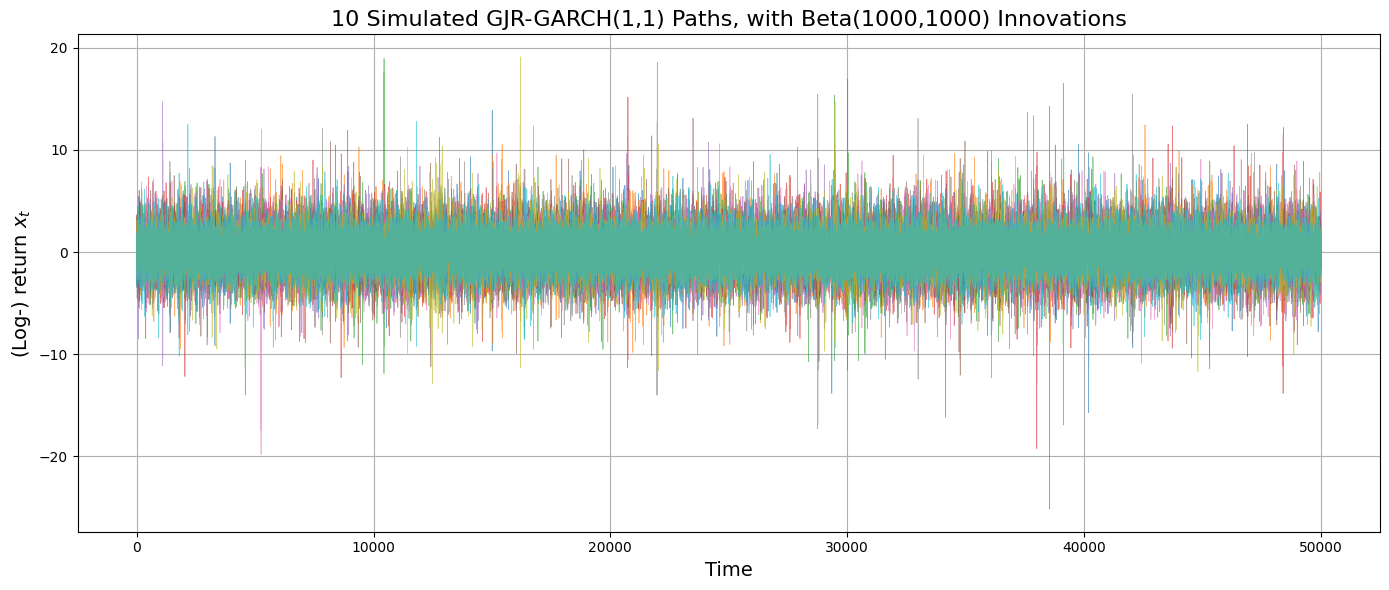

In [48]:
#T = 50000 # Time length
#n_paths = 10 # numer of sampled paths

# Beta shape parameters for each generation
a_value = 1000
a_values = [a_value] * n_paths
labels = [f'a = {a}' for a in a_values]

np.random.seed(6031010)

def sample_beta_symmetric(size, a):
    Y = beta.rvs(a, a, size=size)
    eps = np.sqrt(2 * a + 1) * (2 * Y - 1)
    return eps

# Container for plots
plt.figure(figsize=(14, 6))

for i, a in enumerate(a_values):
    xt = np.zeros(T)
    sigma2 = np.zeros(T)
    epsilon = sample_beta_symmetric(T, a)

    sigma2[0] = omega / (1 - alpha - beta_param - 0.5 * lambd)
    xt[0] = np.sqrt(sigma2[0]) * epsilon[0]

    for t in range(1, T):
        indicator = 1 if xt[t-1] < 0 else 0
        alpha_t = alpha + lambd * indicator
        sigma2[t] = omega + alpha_t * xt[t-1]**2 + beta_param * sigma2[t-1]
        xt[t] = np.sqrt(sigma2[t]) * epsilon[t]

    plt.plot(xt, label=f'Path {i+1} ({labels[i]})', linewidth=0.5, alpha=0.6)

plt.title(f'{n_paths} Simulated GJR-GARCH(1,1) Paths, with Beta({a},{a}) Innovations', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('(Log-) return $x_t$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


## Generations from Multiple Beta(a,a) Innovations

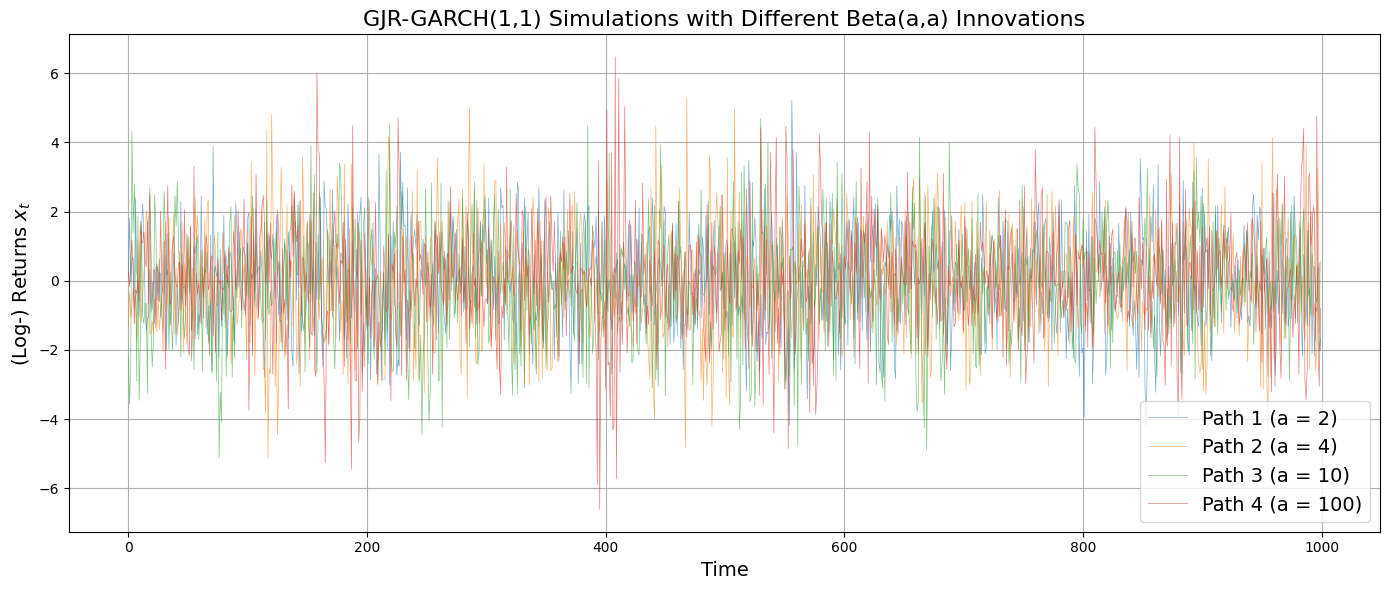

In [60]:
T = 1000 # Time length

# Beta shape parameters for each generation
generations_per_a = 1
a_values = np.repeat([2, 4, 10, 100], generations_per_a)
labels = [f'a = {a}' for a in a_values]

np.random.seed(6031010)

def sample_beta_symmetric(size, a):
    Y = beta.rvs(a, a, size=size)
    eps = np.sqrt(2 * a + 1) * (2 * Y - 1)
    return eps

# Container for plots
plt.figure(figsize=(14, 6))

for i, a in enumerate(a_values):
    xt = np.zeros(T)
    sigma2 = np.zeros(T)
    epsilon = sample_beta_symmetric(T, a)

    sigma2[0] = omega / (1 - alpha - beta_param - 0.5 * lambd)
    xt[0] = np.sqrt(sigma2[0]) * epsilon[0]

    for t in range(1, T):
        indicator = 1 if xt[t-1] < 0 else 0
        alpha_t = alpha + lambd * indicator
        sigma2[t] = omega + alpha_t * xt[t-1]**2 + beta_param * sigma2[t-1]
        xt[t] = np.sqrt(sigma2[t]) * epsilon[t]

    plt.plot(xt, label=f'Path {i+1} ({labels[i]})', linewidth=0.5, alpha=0.6)

plt.title('GJR-GARCH(1,1) Simulations with Different Beta(a,a) Innovations', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('(Log-) Returns $x_t$', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


## Empirical Unconditional Distributions (From Simulations)

Normal innovations:
  Avg sample kurtosis     : 6.94
  Avg Jarque-Bera p-value : 0.0000
  Avg max |return|        : 18.95
  Avg 1% quantile         : -3.976
  Avg Expected Shortfall  : -5.170

Beta innovations (a=2):
  Avg sample kurtosis     : 3.48
  Avg Jarque-Bera p-value : 0.0354
  Avg max |return|        : 11.56
  Avg 1% quantile         : -3.567
  Avg Expected Shortfall  : -4.348

Beta innovations (a=4):
  Avg sample kurtosis     : 4.40
  Avg Jarque-Bera p-value : 0.0000
  Avg max |return|        : 13.54
  Avg 1% quantile         : -3.766
  Avg Expected Shortfall  : -4.704

Beta innovations (a=10):
  Avg sample kurtosis     : 5.18
  Avg Jarque-Bera p-value : 0.0000
  Avg max |return|        : 15.43
  Avg 1% quantile         : -3.883
  Avg Expected Shortfall  : -4.942

Beta innovations (a=100):
  Avg sample kurtosis     : 6.40
  Avg Jarque-Bera p-value : 0.0000
  Avg max |return|        : 18.02
  Avg 1% quantile         : -3.965
  Avg Expected Shortfall  : -5.152



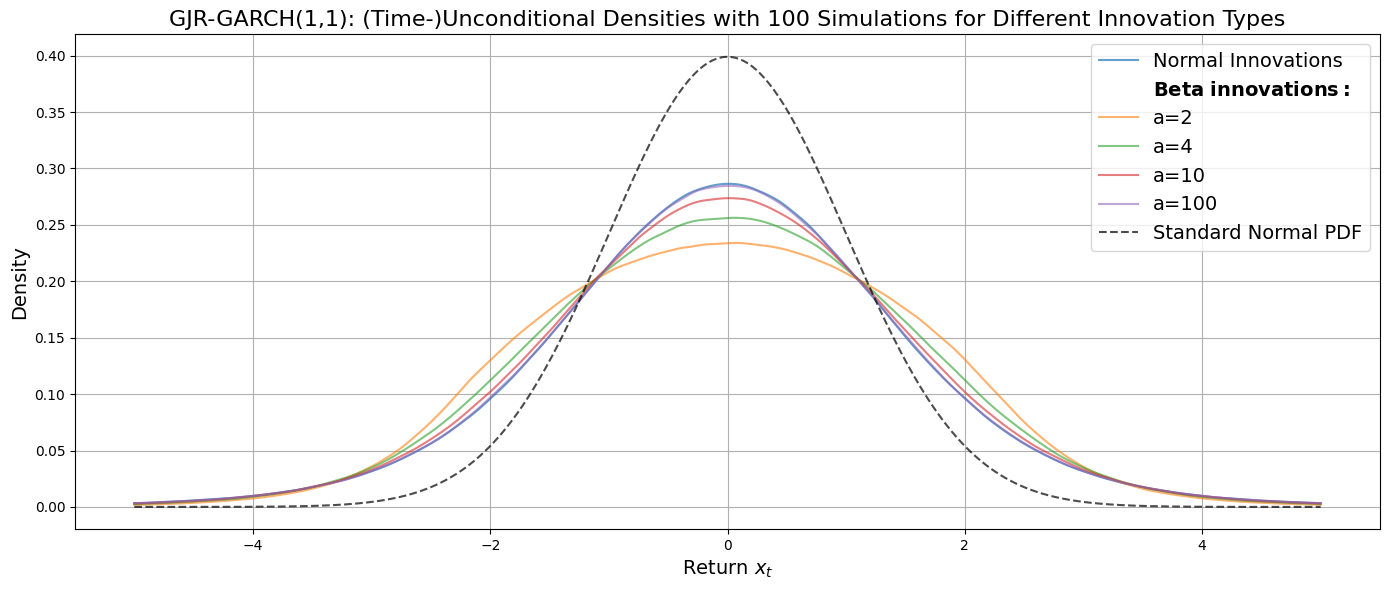

In [5]:
T = 50000 # Time length

a_values = [2, 4, 10, 100]

def simulate_gjr_garch(T, innovation_type='normal', a_beta=5.0, seed=6031010):
    np.random.seed(seed)

    if innovation_type == 'normal':
        eps = np.random.normal(0, 1, T)
    elif innovation_type == 'beta':
        Y = beta.rvs(a_beta, a_beta, size=T)
        eps = np.sqrt(2 * a_beta + 1) * (2 * Y - 1)
    else:
        raise ValueError("innovation_type must be 'normal' or 'beta'")

    xt = np.zeros(T)
    sigma2 = np.zeros(T)
    sigma2[0] = omega / (1 - alpha - beta_param - 0.5 * lambd)
    xt[0] = np.sqrt(sigma2[0]) * eps[0]

    for t in range(1, T):
        indicator = 1 if xt[t-1] < 0 else 0
        alpha_t = alpha + lambd * indicator
        sigma2[t] = omega + alpha_t * xt[t-1]**2 + beta_param * sigma2[t-1]
        xt[t] = np.sqrt(sigma2[t]) * eps[t]

    return xt

def risk_stats(xs, label):
    ks = [kurtosis(x, fisher=False) for x in xs]
    jb_ps = [jarque_bera(x).pvalue for x in xs]
    max_returns = [np.max(np.abs(x)) for x in xs]
    q1 = [np.quantile(x, 0.01) for x in xs]
    es1 = [np.mean(x[x < np.quantile(x, 0.01)]) for x in xs]
    print(f"{label}:")
    print(f"  Avg sample kurtosis     : {np.mean(ks):.2f}")
    print(f"  Avg Jarque-Bera p-value : {np.mean(jb_ps):.4f}")
    print(f"  Avg max |return|        : {np.mean(max_returns):.2f}")
    print(f"  Avg 1% quantile         : {np.mean(q1):.3f}")
    print(f"  Avg Expected Shortfall  : {np.mean(es1):.3f}")
    print("")


def compare_multiple_beta_shapes(sims_per_innovation=10):
    x_vals = np.linspace(-5, 5, 500)
    plt.figure(figsize=(14, 6))

    # Normal baseline
    xs_norm = [simulate_gjr_garch(T, innovation_type='normal', seed=6031010 + i)
               for i in range(sims_per_innovation)]
    kde_norm = gaussian_kde(np.concatenate(xs_norm))
    plt.plot(x_vals, kde_norm(x_vals), label='Normal Innovations', lw=1.5, alpha=0.7)
    risk_stats(xs_norm, "Normal innovations")

    # --- Beta innovations (legend title only, no line) ---
    beta_legend_entry = Line2D([0], [0], color="none", label=r"$\mathbf{Beta\ innovations:}$")
    plt.gca().add_line(beta_legend_entry)

    for a in a_values:
        xs_beta = [simulate_gjr_garch(T, innovation_type='beta', a_beta=a,
                                      seed=6031010 + i) for i in range(sims_per_innovation)]
        kde_beta = gaussian_kde(np.concatenate(xs_beta))
        plt.plot(x_vals, kde_beta(x_vals), lw=1.5, alpha=0.6, label=f'a={a}')
        risk_stats(xs_beta, f"Beta innovations (a={a})")

    # Standard normal reference
    plt.plot(x_vals, norm.pdf(x_vals), 'k--', label='Standard Normal PDF', lw=1.5, alpha=0.7)

    plt.title(f'GJR-GARCH(1,1): (Time-)Unconditional Densities with {sims_per_innovation} Simulations for Different Innovation Types', fontsize=16)
    plt.xlabel('Return $x_t$', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the comparison with desired number of simulations
compare_multiple_beta_shapes(sims_per_innovation=100)